In [1]:
import argparse
import logging
import sys
import time

from tf_pose import common
import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
logger = logging.getLogger('TfPoseEstimatorRun')
logger.handlers.clear()
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('[%(asctime)s] [%(name)s] [%(levelname)s] %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)

In [3]:
class MyArgs():
    def __init__(self):
        self.image = './images/p1.jpg'
        self.model = 'mobilenet_thin'
        self.resize = '0x0'
        self.resize_out_ratio = 4.0
args = MyArgs()

In [4]:
w, h = model_wh(args.resize)
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path(args.model), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path(args.model), target_size=(w, h))

[2020-11-02 02:57:39,363] [TfPoseEstimator] [INFO] loading graph from /home/jovyan/work/fall-detection/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)
2020-11-02 02:57:39,363 INFO loading graph from /home/jovyan/work/fall-detection/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimator/M

In [5]:
import matplotlib.pyplot as plt
def handleImage(image_path, GaussianBlur_window_size=None):
    global e
    global logger
    image = common.read_imgfile(image_path, None, None)
    if image is None:
        logger.error('Image can not be read, path=%s' % args.image)
        sys.exit(-1)

    t = time.time()
    if GaussianBlur_window_size is not None:
        image = cv2.GaussianBlur(image, GaussianBlur_window_size, 0)
    humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=args.resize_out_ratio)
    elapsed = time.time() - t

    logger.info('inference image: %s in %.4f seconds.' % (args.image, elapsed))

    image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)

    try:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        return humans
    except Exception as e:
        logger.warning('matplitlib error, %s' % e)
        #cv2.imshow('result', image)
        cv2.waitKey()
        return None

[2020-11-02 02:57:43,025] [TfPoseEstimatorRun] [INFO] inference image: ./images/p1.jpg in 0.2504 seconds.
2020-11-02 02:57:43,025 INFO inference image: ./images/p1.jpg in 0.2504 seconds.


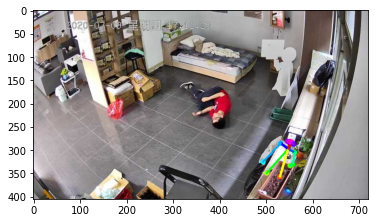

In [6]:
hs = handleImage('./mdata/images/bed_data_1-199.jpg')

[2020-11-02 02:57:43,426] [TfPoseEstimatorRun] [INFO] inference image: ./images/p1.jpg in 0.0470 seconds.
2020-11-02 02:57:43,426 INFO inference image: ./images/p1.jpg in 0.0470 seconds.


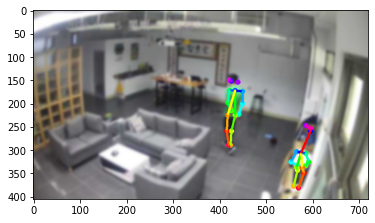

In [7]:
hs = handleImage('./mdata/images/data_1_q50_i87.jpg', (15, 15))

In [8]:
hs[0].body_parts

{1: BodyPart:1-(0.60, 0.43) score=0.77,
 2: BodyPart:2-(0.62, 0.43) score=0.74,
 3: BodyPart:3-(0.62, 0.50) score=0.71,
 4: BodyPart:4-(0.61, 0.55) score=0.65,
 5: BodyPart:5-(0.59, 0.43) score=0.71,
 6: BodyPart:6-(0.58, 0.49) score=0.68,
 7: BodyPart:7-(0.59, 0.53) score=0.16,
 8: BodyPart:8-(0.60, 0.55) score=0.50,
 9: BodyPart:9-(0.59, 0.64) score=0.46,
 10: BodyPart:10-(0.59, 0.71) score=0.43,
 11: BodyPart:11-(0.58, 0.55) score=0.64,
 12: BodyPart:12-(0.58, 0.64) score=0.55,
 13: BodyPart:13-(0.58, 0.71) score=0.47,
 15: BodyPart:15-(0.59, 0.37) score=0.13,
 16: BodyPart:16-(0.61, 0.38) score=0.29,
 17: BodyPart:17-(0.59, 0.38) score=0.67}

In [9]:
t = hs[0].body_parts.keys()
len(t)

16

In [10]:
# img = cv2.imread('./mdata/images/data_1_q50_i87.jpg')
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
# img = cv2.imread('./mdata/images/data_1_q50_i87.jpg')
# img = cv2.GaussianBlur(img, (15, 15), 0)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
# import cv2
# import base64

# img = cv2.imread('./mdata/images/test_m.jpg')
# _, imdata = cv2.imencode('.jpg', img)
# imdata = base64.b64encode(imdata).decode()
# data = {
#     "img": imdata
# }
# data

In [13]:
# import requests
# url = 'https://fall-detection-line-notify.406.csie.nuu.edu.tw/api/config'
# r = requests.get(url)
# r.json()

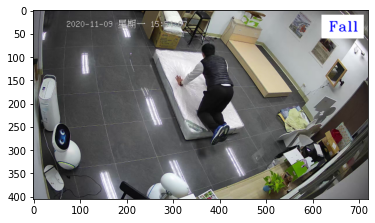

In [50]:
img1 = cv2.imread('./mdata/images/BedTest-137.png')

#圖片，文字，位置，字體，字號，顏色，厚度
cv2.rectangle(img1, (620, 10), (710, 60), (255, 255, 255), -1)
cv2.putText(img1, 'Fall', (635, 45), 4, 1, (255, 0, 0), 1, cv2.LINE_AA)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))